<a href="https://colab.research.google.com/github/ann-e888/Neural-Networks---Pytorch-Lightning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

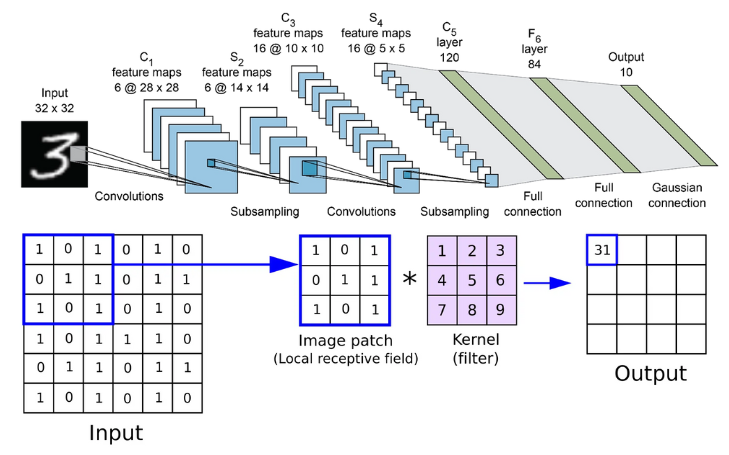

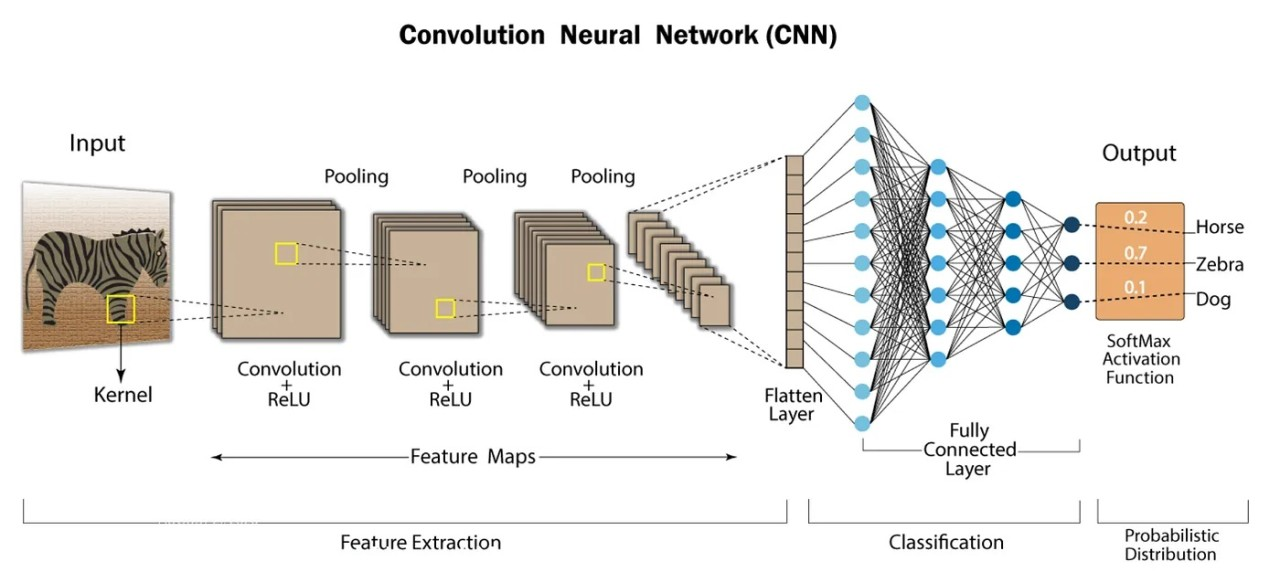

In [146]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# convert MNIST image files into tensor of 4 dimensions (nr of images, height, width, color channel)
transform = transforms.ToTensor()

In [148]:
# train data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [149]:
# test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [150]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [151]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [152]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [153]:
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [154]:
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [155]:
X_Train.shape

torch.Size([1, 28, 28])

In [156]:
x = X_Train.view(1,1,28,28)

In [157]:
x = F.relu(conv1(x))

In [158]:
# 1 img, 6 filters, image of size 26x26
x.shape

torch.Size([1, 6, 26, 26])

In [159]:
x = F.max_pool2d(x, 2, 2) # kernel of size 2 and stride 2

In [160]:
x.shape

torch.Size([1, 6, 13, 13])

In [161]:
x = F.relu(conv2(x))

In [162]:
x.shape

torch.Size([1, 16, 11, 11])

In [163]:
x = F.max_pool2d(X, 2, 2)

In [164]:
x.shape

torch.Size([1, 16, 2, 2])

In [165]:
class ConvolutionalNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    X = X.view(-1, 16*5*5) #flatten out data, negative 1 so the batch size can vary

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [166]:
torch.manual_seed(41)
model = ConvolutionalNetwork()

In [167]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [168]:
# loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [179]:
import time
start_time = time.time()

epochs = 5
train_loses = []
test_loses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1 #start batches at 1
    y_pred = model(X_train) #get predicted values
    loss = criterion(y_pred, y_train) #how off are the predictions

    predicted = torch.max(y_pred.data, 1)[1] #adding number of correct predictions, [1] takes the indices of max values
    batch_corr = (predicted == y_train).sum() #adding correct predictions in the batch
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_loses.append(loss)
  train_correct.append(trn_corr)

  #testing
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] #adding correct predictions
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_loses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training took: {total/60} minutes!')

Epoch: 0 Batch: 600 Loss: 0.00036099221324548125
Epoch: 0 Batch: 1200 Loss: 0.0001712304074317217
Epoch: 0 Batch: 1800 Loss: 0.0005378525820560753
Epoch: 0 Batch: 2400 Loss: 0.027378559112548828
Epoch: 0 Batch: 3000 Loss: 0.0002596829435788095
Epoch: 0 Batch: 3600 Loss: 8.657989383209497e-05
Epoch: 0 Batch: 4200 Loss: 0.00040106248343363404
Epoch: 0 Batch: 4800 Loss: 1.2349883036222309e-05
Epoch: 0 Batch: 5400 Loss: 0.00046615247265435755
Epoch: 0 Batch: 6000 Loss: 0.000162848416948691
Epoch: 1 Batch: 600 Loss: 6.399912672350183e-05
Epoch: 1 Batch: 1200 Loss: 0.0002539866545703262
Epoch: 1 Batch: 1800 Loss: 0.0003175207821186632
Epoch: 1 Batch: 2400 Loss: 8.683211490279064e-05
Epoch: 1 Batch: 3000 Loss: 0.00015392867499031126
Epoch: 1 Batch: 3600 Loss: 0.12387670576572418
Epoch: 1 Batch: 4200 Loss: 0.00015394852380268276
Epoch: 1 Batch: 4800 Loss: 0.00032526275026611984
Epoch: 1 Batch: 5400 Loss: 0.08193918317556381
Epoch: 1 Batch: 6000 Loss: 1.2692201137542725
Epoch: 2 Batch: 600 Loss

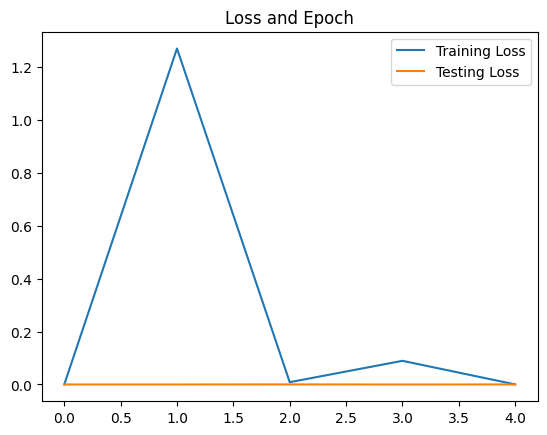

In [180]:
#plot results
train_loses = [tl.item() for tl in train_loses]
plt.plot(train_loses, label='Training Loss')
plt.plot(test_loses, label = 'Testing Loss')
plt.title('Loss and Epoch')
plt.legend()

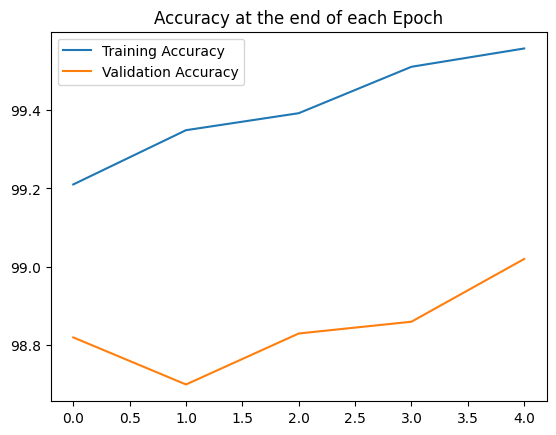

In [181]:
#plot accuracy
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Validation Accuracy')
plt.title('Accuracy at the end of each Epoch')
plt.legend()

In [182]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [213]:
with torch.no_grad():
    correct = 0
    wrong = []

    for batch_idx, (X_test, y_test) in enumerate(test_load_everything):
        y_val = model(X_test)  # Perform inference
        predicted = torch.max(y_val, 1)[1]  # Get predicted labels

        #update the count of correct predictions
        correct += (predicted == y_test).sum().item()

        #loop through each sample in the batch
        for sample_idx, (prediction, label) in enumerate(zip(predicted, y_test)):
            if prediction != label:
                #get the absolute index in the dataset
                absolute_index = batch_idx * test_load_everything.batch_size + sample_idx
                wrong.append([absolute_index, prediction.item(), label.item()])


In [215]:
correct/len(test_data)*100

99.02

In [216]:
wrong, len(wrong)

([[412, 3, 5],
  [449, 5, 3],
  [551, 3, 7],
  [582, 2, 8],
  [813, 8, 9],
  [900, 3, 1],
  [947, 9, 8],
  [956, 5, 1],
  [965, 0, 6],
  [1014, 5, 6],
  [1039, 1, 7],
  [1112, 6, 4],
  [1114, 8, 3],
  [1226, 2, 7],
  [1242, 9, 4],
  [1260, 1, 7],
  [1393, 3, 5],
  [1403, 6, 1],
  [1414, 7, 9],
  [1459, 7, 2],
  [1527, 5, 1],
  [1530, 7, 8],
  [1621, 6, 0],
  [1709, 5, 9],
  [1737, 3, 5],
  [1878, 3, 8],
  [1901, 4, 9],
  [1903, 2, 7],
  [1941, 2, 7],
  [2018, 2, 1],
  [2035, 3, 5],
  [2098, 0, 2],
  [2118, 0, 6],
  [2130, 9, 4],
  [2135, 1, 6],
  [2195, 2, 7],
  [2266, 5, 1],
  [2293, 4, 9],
  [2488, 4, 2],
  [2514, 9, 4],
  [2654, 1, 6],
  [2770, 8, 3],
  [2953, 5, 3],
  [2995, 8, 6],
  [3060, 3, 9],
  [3115, 9, 5],
  [3225, 9, 7],
  [3422, 0, 6],
  [3448, 2, 3],
  [3451, 3, 7],
  [3457, 6, 1],
  [3490, 9, 4],
  [3520, 4, 6],
  [3726, 9, 4],
  [3730, 9, 7],
  [3806, 8, 5],
  [3850, 4, 9],
  [3902, 3, 5],
  [4078, 8, 9],
  [4176, 7, 2],
  [4238, 3, 7],
  [4265, 3, 4],
  [4284, 5, 9],
 

In [222]:
test_data[9792][1]

4

In [223]:
test_data[9792][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

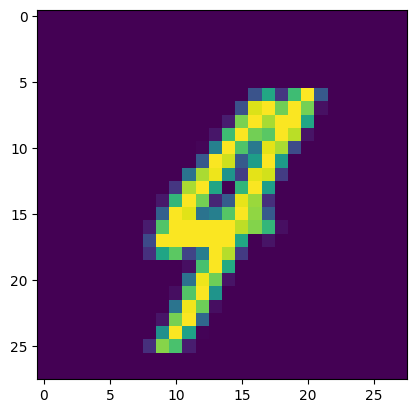

In [224]:
plt.imshow(test_data[9792][0].reshape(28,28))

In [225]:
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[9792][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28x28 img


new_prediction

tensor([[-1.8220e+01, -1.6047e+01, -2.0050e+01, -1.3688e+01, -6.8542e+00,
         -1.2573e+01, -2.7800e+01, -1.0491e+01, -1.2015e+01, -1.0941e-03]])

In [226]:
new_prediction.argmax()

tensor(9)